In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dataset
df = pd.read_csv('/Users/zaid/Documents/HealthCare Data Analytics/heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

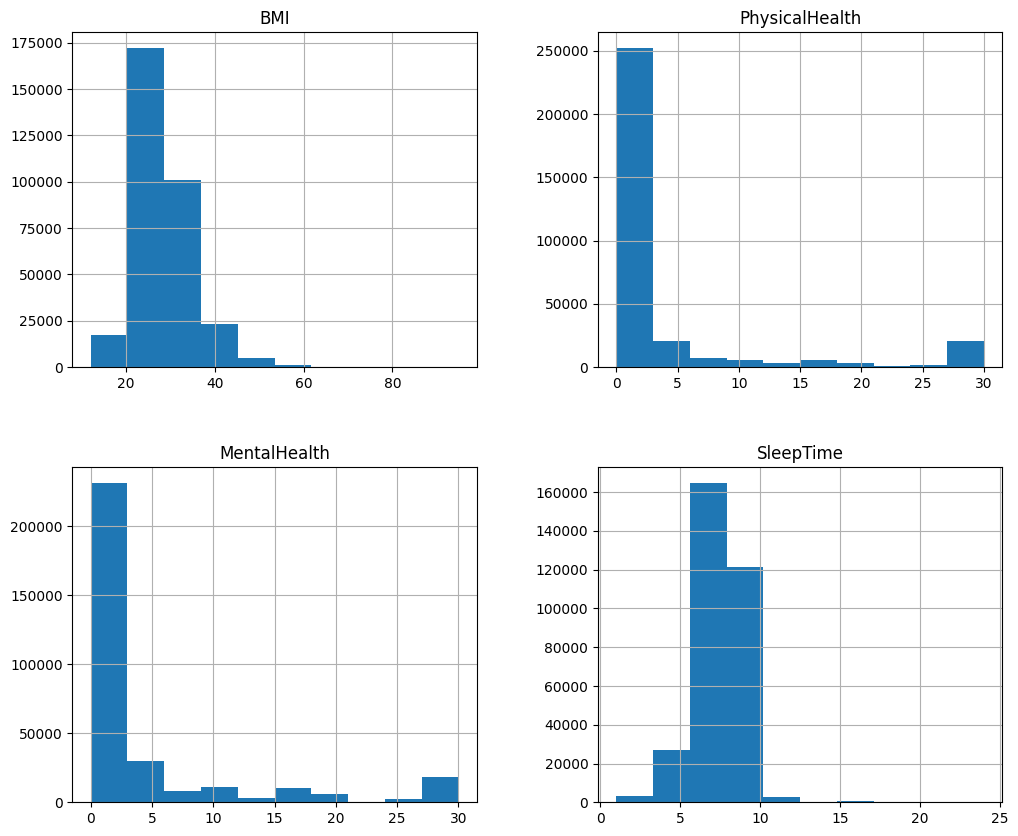

In [6]:
# Histograms
df.hist(figsize=(12, 10))
plt.show()

Outlier Detection

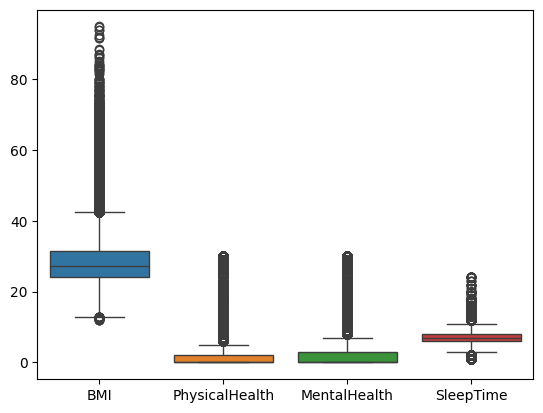

In [7]:
# Box plots
sns.boxplot(data=df)
plt.show()

Data Imbalance Analysis

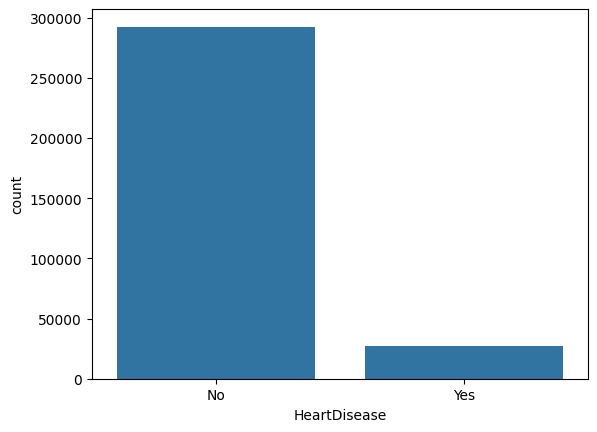

In [8]:
#Visualize Class Distribution

sns.countplot(x='HeartDisease', data=df)
plt.show()

Feature Engineering

In [9]:
# Encode categorical variables

df_encoded = df.copy() #copy the contents of original dataframe to a new one
label_encoders = {}
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
           'DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 
           'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']
for column in columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

df_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


Fetaure Importance Analysis

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest classifier
model = RandomForestClassifier()
model.fit(df_encoded.drop('HeartDisease', axis=1), df_encoded['HeartDisease'])

# Feature importance
importance = model.feature_importances_
features = df_encoded.drop('HeartDisease', axis=1).columns
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)
print(feature_importance)

BMI                 0.359611
SleepTime           0.106979
AgeCategory         0.100759
PhysicalHealth      0.073696
MentalHealth        0.067285
GenHealth           0.056051
Race                0.035958
Diabetic            0.027656
Stroke              0.027540
DiffWalking         0.024481
PhysicalActivity    0.023122
Asthma              0.020061
Sex                 0.019426
SkinCancer          0.017003
Smoking             0.016606
KidneyDisease       0.014309
AlcoholDrinking     0.009456
dtype: float64


Correlation Matrix

In [11]:
# Correlation matrix between features and target variable

corr_matrix = df_encoded.corr()

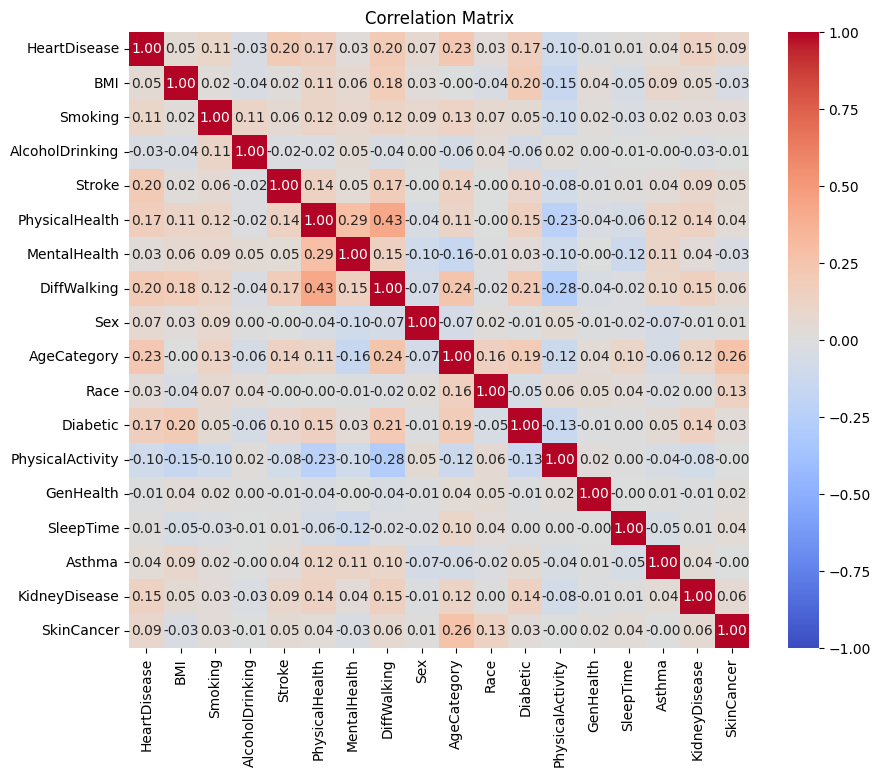

In [12]:
# Visualize the Correlation Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Building predictive model

In [13]:
# Define features and target variable
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.9155240075673479
Confusion Matrix:
 [[58053   431]
 [ 4972   503]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.54      0.09      0.16      5475

    accuracy                           0.92     63959
   macro avg       0.73      0.54      0.56     63959
weighted avg       0.89      0.92      0.89     63959

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9056739473725355
Confusion Matrix:
 [[57303  1181]
 [ 4852   623]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.35      0.11      0.17      5475

    accuracy                           0.91     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.91      0.88     63959

-----------------------------------------